<h1>Функции активации</h1>
<br>
<br>
Этот документ посвящен функциям активации в слоях <b>Keras</b> из подмодуля <i>keras.activation</i>.

Все фукнции запрограммированны на работу с массивами <b>NumPy</b> и поддерживают векторизацию. 

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Основная функция этого документа: построение графика функции $\sigma(x)$.

In [2]:
def plot(func, name_of_func:str, label:str):
    fig = plt.figure(figsize=(20, 10))
    fig.clear()
    X = np.linspace(-30, 30, 1000)
    y = func(X)
    
    plt.plot(X, 
             y, 
             label=label, 
             color='blue', 
             linewidth=3)
    
    plt.xlabel('x', fontsize=30)
    plt.ylabel('y', fontsize=30)
    plt.title(name_of_func, fontsize=30)
    plt.grid(True)
    plt.legend(loc='upper left', fontsize=30)

<h2>Softmax activation</h2>

<i>Softmax</i> используется в качестве функции активации при мультиклассовой классификации, ведь сумма его вывода всегда равняется единице. Является частным случаем логистической функции для тензора.
Если softmax это $σ(z)$, то

$$\sigma(z)_i = \frac{e^{z_i}}{\sum_{k=0}^K e^{z_k}}$$

In [3]:
def softmax(x:np.ndarray):
    sigma = np.sum(np.exp(x))
    return np.exp(x) / sigma

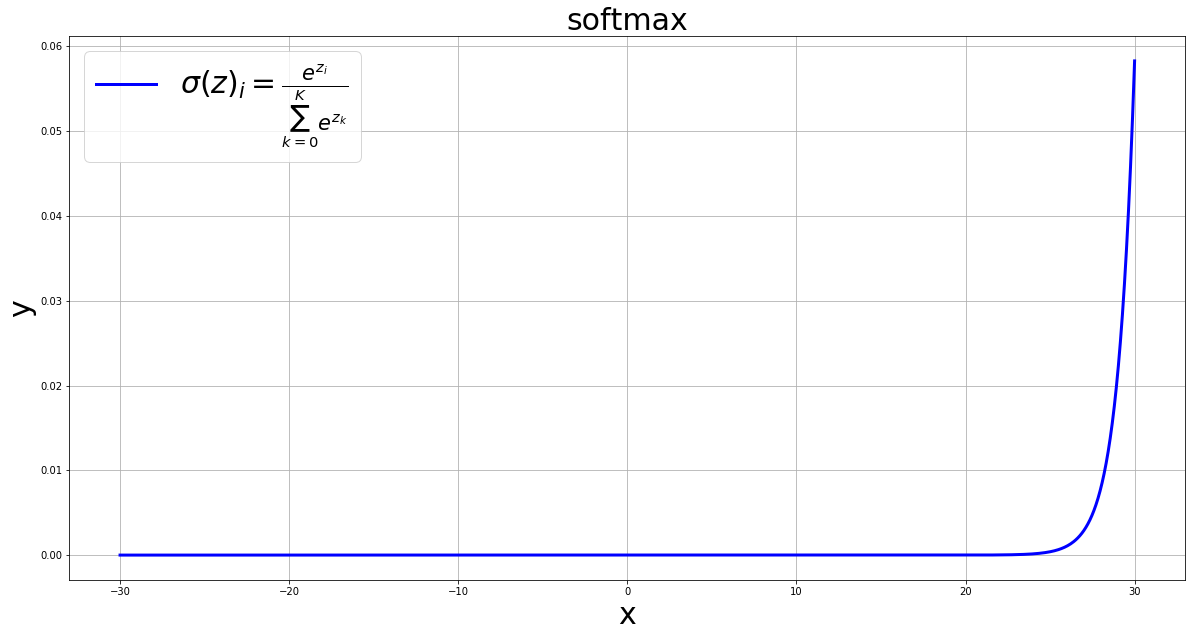

In [4]:
softmax_label = r'$\sigma(z)_i = \frac{e^{z_i}}{\sum_{k=0}^K e^{z_k}}$'
plot(softmax, 'softmax', softmax_label)

<h2>Elu activation</h2>

Elu (Exponential linear unit) - функция активации, которая зависит от знака своего аргумента.

$$\mathrm{\sigma}(x) = \begin{cases} x & \text{if } x \geq 0, \\ \alpha (e^x - 1) & \text{if } x < 0.\end{cases}$$
<br>
$$\lim_{x\to-\infty}\alpha (e^x - 1) = -1$$
<br>
$$\lim_{x\to+\infty}\alpha (e^x - 1) = \infty$$

In [5]:
def elu(x:np.ndarray, alpha=1):
    return np.where(x < 0, alpha * (np.exp(x) - 1), x)

<div class="alert alert-block alert-warning">
<b>matplotlib</b> не поддерживает полную разметку LATEX, потому не получится полностью отобразить $elu(x)$ в легенде. 
</div>    

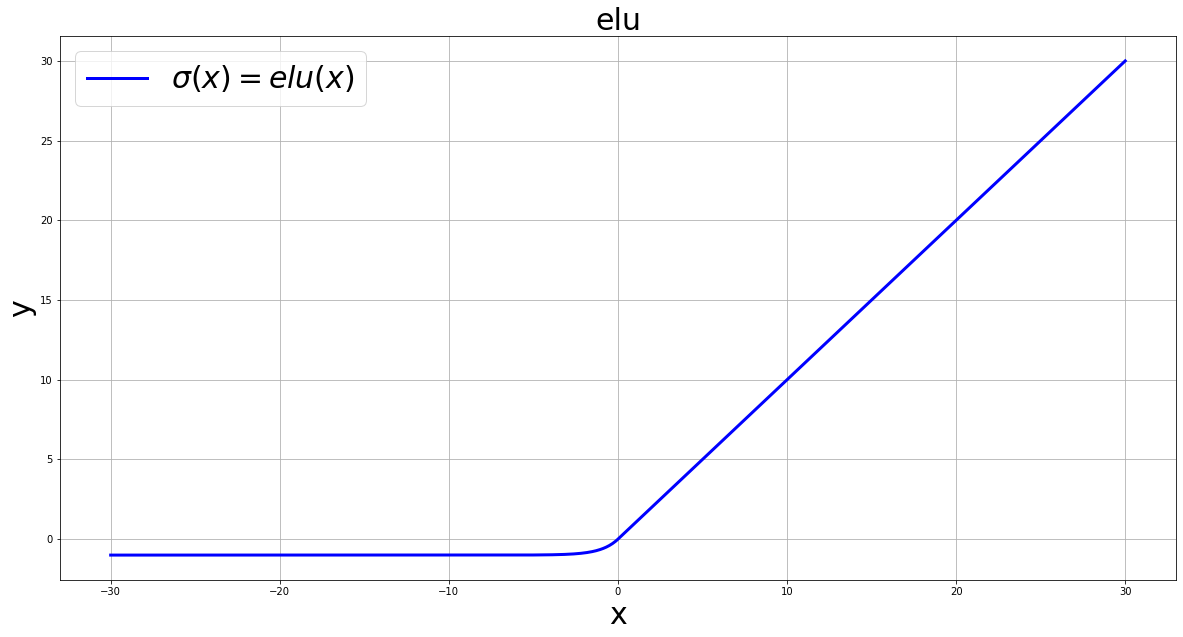

In [6]:
elu_label = r'$\sigma(x) = elu(x)$'
plot(elu, 'elu', elu_label)

<h2>Softplus</h2>

Softplus имеет вид:

$$\sigma(x) = ln(e^x + 1)$$
<br>
$$ \lim_{x\to-\infty}ln(e^x + 1) = 0 $$ 

In [7]:
def softplus(x:np.ndarray):
    return np.log(np.exp(x) + 1)

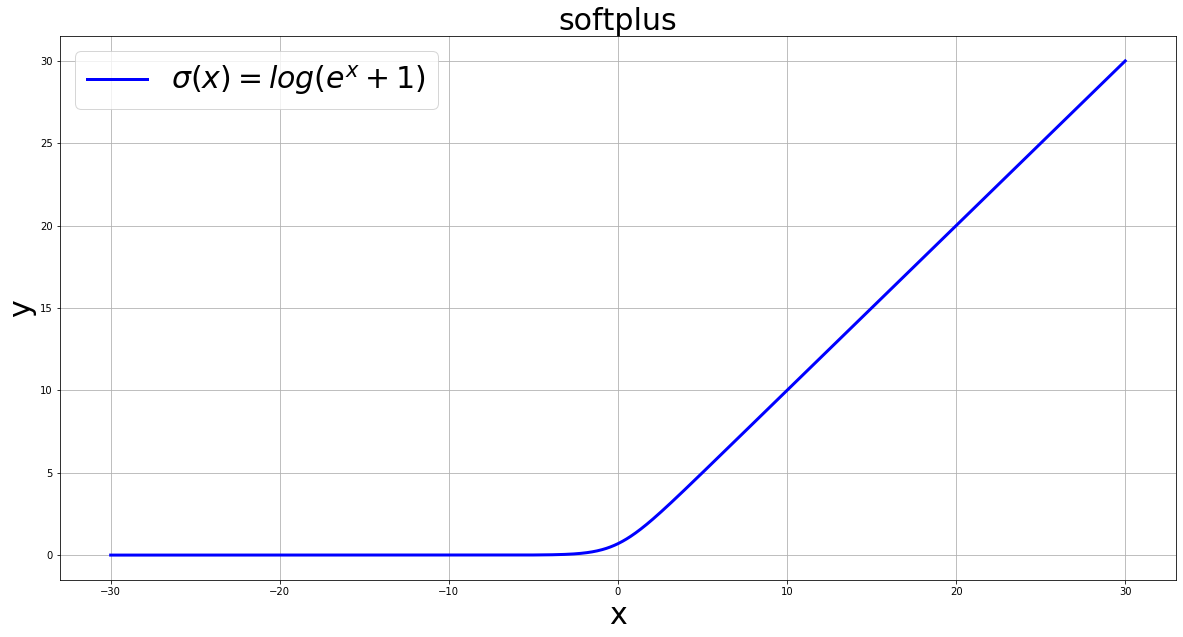

In [8]:
softplus_label = r'$\sigma(x) = log(e^x + 1)$'
plot(softplus, 'softplus', softplus_label)

<h2>Softsign</h2>

Несмотря на схожесть в названии с предыдущей функцией, <b>softsign</b> не имеет отношение к экспоненте:

$$\sigma(x) = \frac{x}{|x| + 1}$$

$$\begin{cases}  \lim_{x\to+\infty}\frac{x}{|x| + 1} = 1 , \\  \lim_{x\to-\infty}\frac{x}{|x| + 1} = -1\end{cases}$$


In [9]:
def softsign(x:np.ndarray):
    return x / (np.abs(x) + 1)

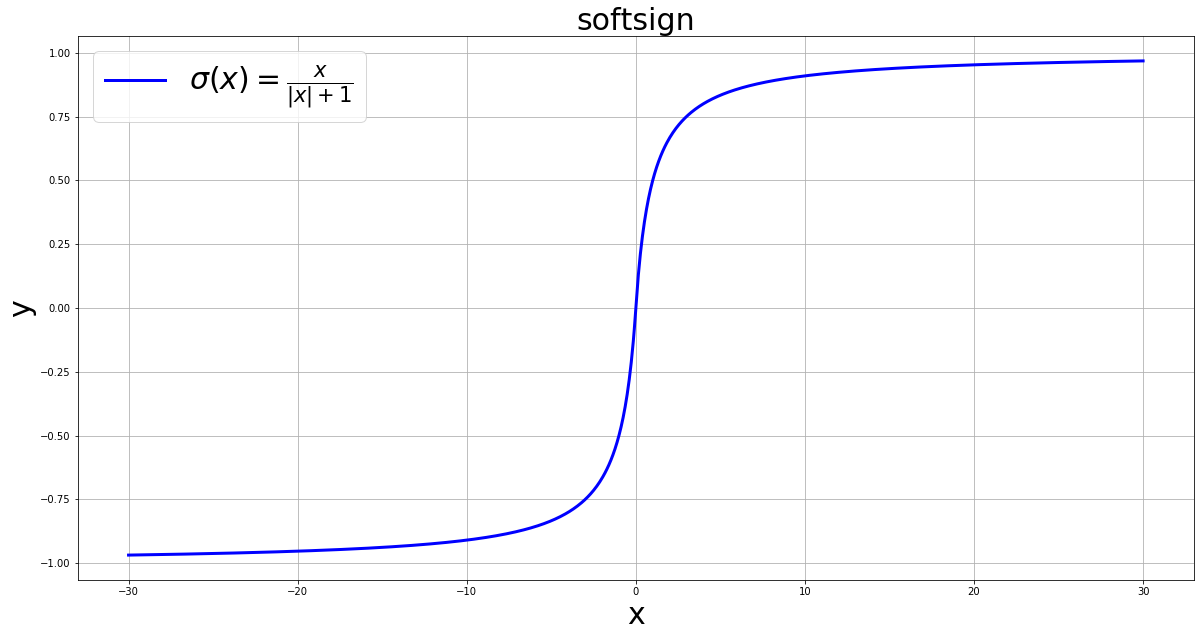

In [10]:
softsign_label = r'$\sigma(x) = \frac{x}{|x| + 1}$'
plot(softsign, 'softsign', softsign_label)

<h2>RELU</h2>

<b>Relu (Rectified Linear Unit)</b> - одна из самых популярных функций активации. Имеет довольно простой вид:
$$\sigma(x) = \begin{cases} 
x & \text{if } x \gt 0, \\ 0 & \text{if } x \leq 0.
\end{cases}$$

<div class="alert alert-block alert-warning">
    У нас опять кусочно-заданная функция, потому легенду <b>matplotlib</b> указываем как $relu(x)$.
</div>    

In [11]:
def relu(x:np.ndarray):
    return np.where(x >= 0, x, 0)

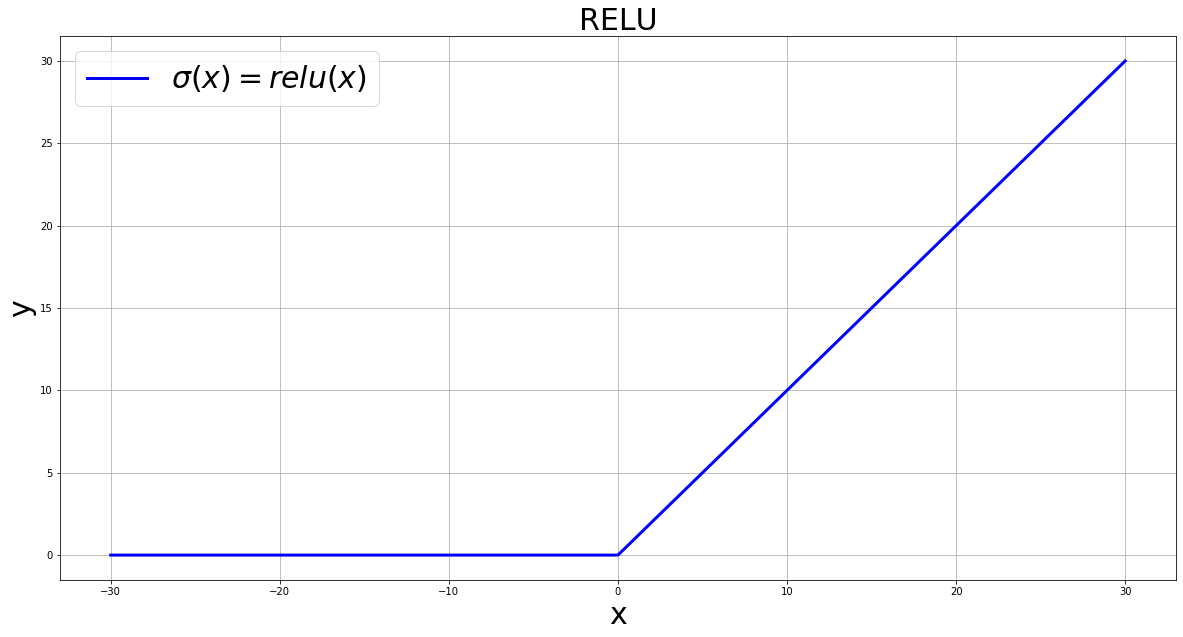

In [12]:
relu_label = r'$\sigma(x) = relu(x)$'
plot(relu, 'RELU', relu_label)

<h2>Гиперболический тангенс - tanh/th</h2>

Гиперболический тангенс - одна из основных гиперболических функций. Доведём цепочку преобразований до общей формулы:

$$\tanh(x) = \frac{\sinh(x)}{\cosh(x)} = \frac{\frac{e^x - e^{-x}}{2}}{\frac{e^x + e^{-x}}{2}} =
= \frac{e^{-x} \dot (e^{2x} - 1)}{e^{-x} \dot (e^{2x} + 1)} = \frac{e^{2x} - 1}{e^{2x} + 1}$$
<br>
$$\lim_{x\to+\infty}{\frac{e^{2x} - 1}{e^{2x} + 1}} = 1$$
<br>
$$\lim_{x\to-\infty}{\frac{e^{2x} - 1}{e^{2x} + 1}} = -1$$

In [13]:
def tanh(x:np.ndarray):
    return np.tanh(x)

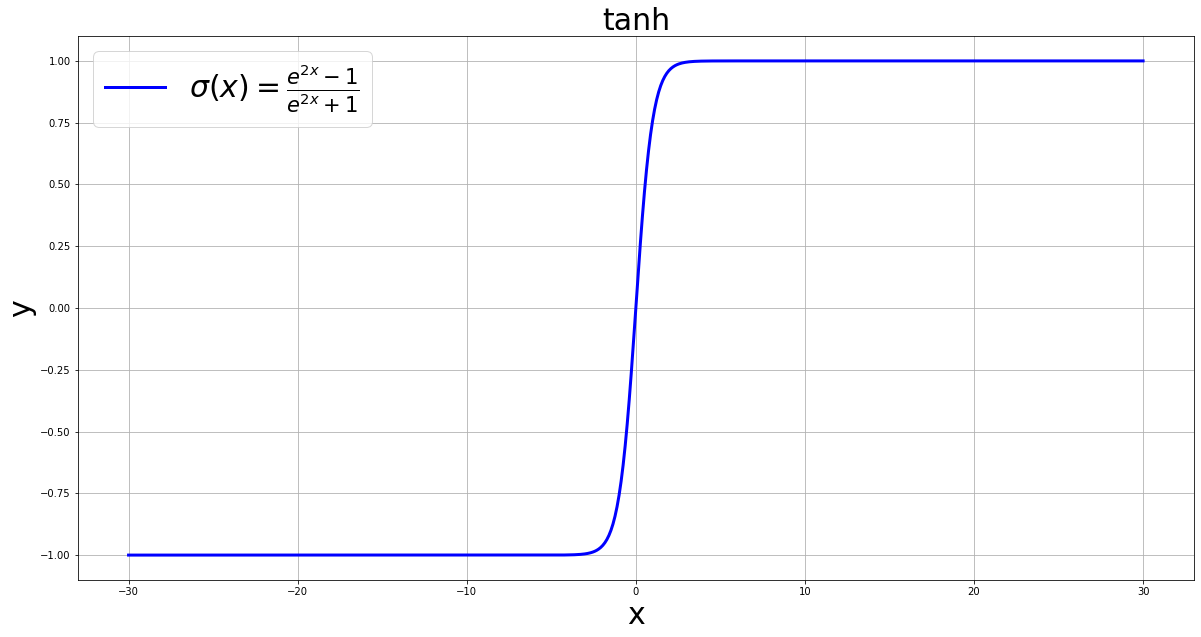

In [14]:
tanh_label = r'$\sigma(x) = \frac{e^{2x} - 1}{e^{2x} + 1}$'
plot(tanh, 'tanh', tanh_label)

<h2>Sigmoid</h2>

<b>Sigmoid</b> - функция активации, которая используется при бинарной классификации. Применяется для сглаживания некой величины (ведь имеет область значений от 0 до 1). Имеет вид:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$
<br>
$$\lim_{x\to+\infty}{\frac{1}{1 + e^{-x}}} = 1$$
<br>
$$\lim_{x\to-\infty}{\frac{1}{1 + e^{-x}}} = 0$$

In [15]:
def sigmoid(x:np.ndarray):
    return 1 / (np.exp(-x) + 1)

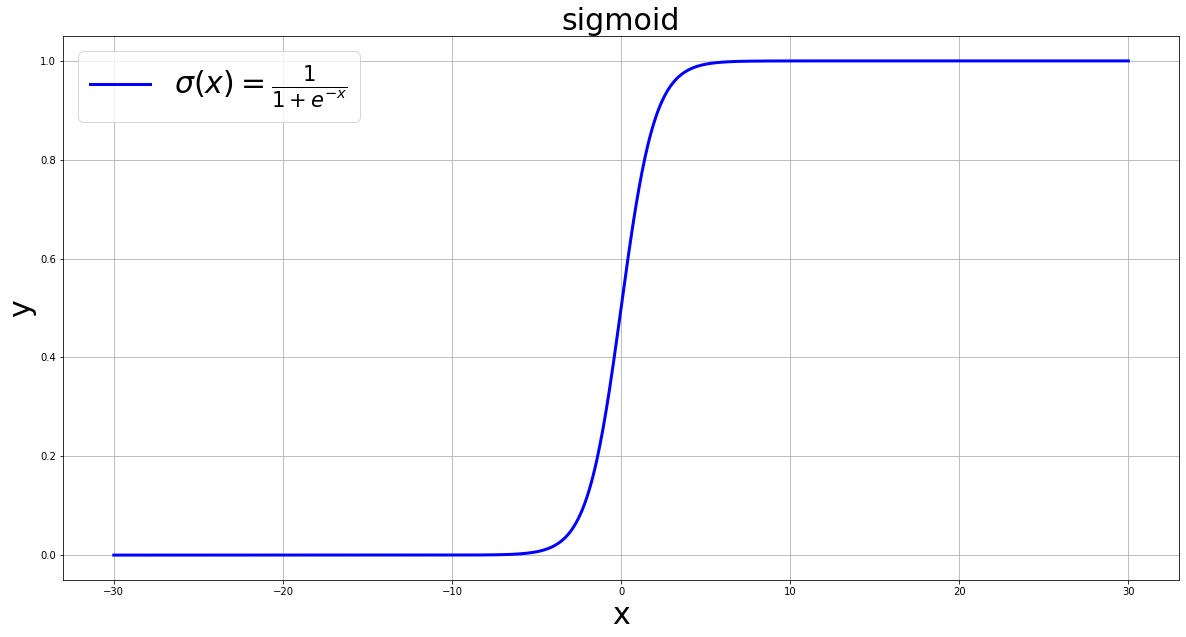

In [16]:
sigmoid_label = r'$\sigma(x) = \frac{1}{1 + e^{-x}}$'
plot(sigmoid, 'sigmoid', sigmoid_label)

<h2>Hard sigmoid</h2>

Функция, имеющая вид:

$$\begin{cases}  
0 & \text{if } x \lt -2.5 , \\  
1 & \text{if } x \gt 2.5 , \\ 
0.2 * x + 0.5 & \text{if } -2.5 \leq x \leq 2.5
\end{cases}$$

<div class="alert alert-block alert-warning">
    Смотр. RELU и Elu.
</div>    

In [17]:
def hard_sigmoid(x:np.ndarray):
    return np.where(x <= 2.5, 
                    np.where(x < -2.5, 
                             0, 
                             0.2 * x + 0.5),
                    1)

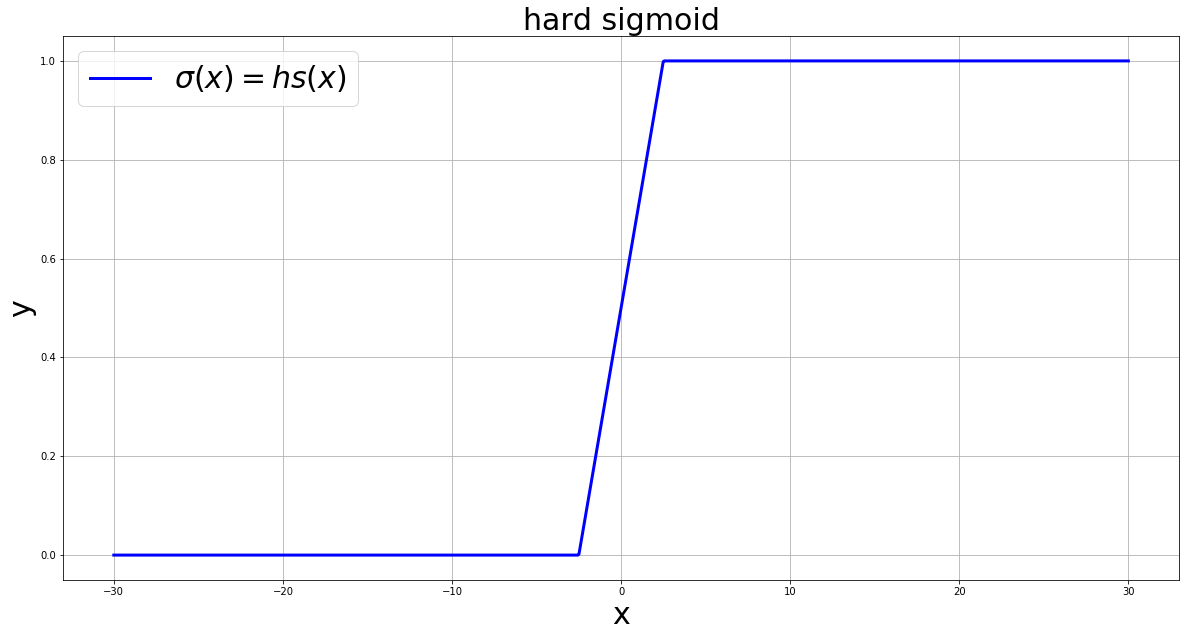

In [18]:
hard_sigmoid_label = r'$\sigma(x) = hs(x)$'
plot(hard_sigmoid, 'hard sigmoid', hard_sigmoid_label)

<h2>Exponential</h2>

Обычная експоненциальная функция, которая не раз использовалась в предыдущих функциях.
<br>
$$\sigma(x) = e^x$$
<br>
$$\lim_{x\to+\infty}{e^x} = +\infty$$
<br>
$$\lim_{x\to-\infty}{e^x} = 0$$

In [19]:
def exponential(x:np.ndarray):
    return np.exp(x)

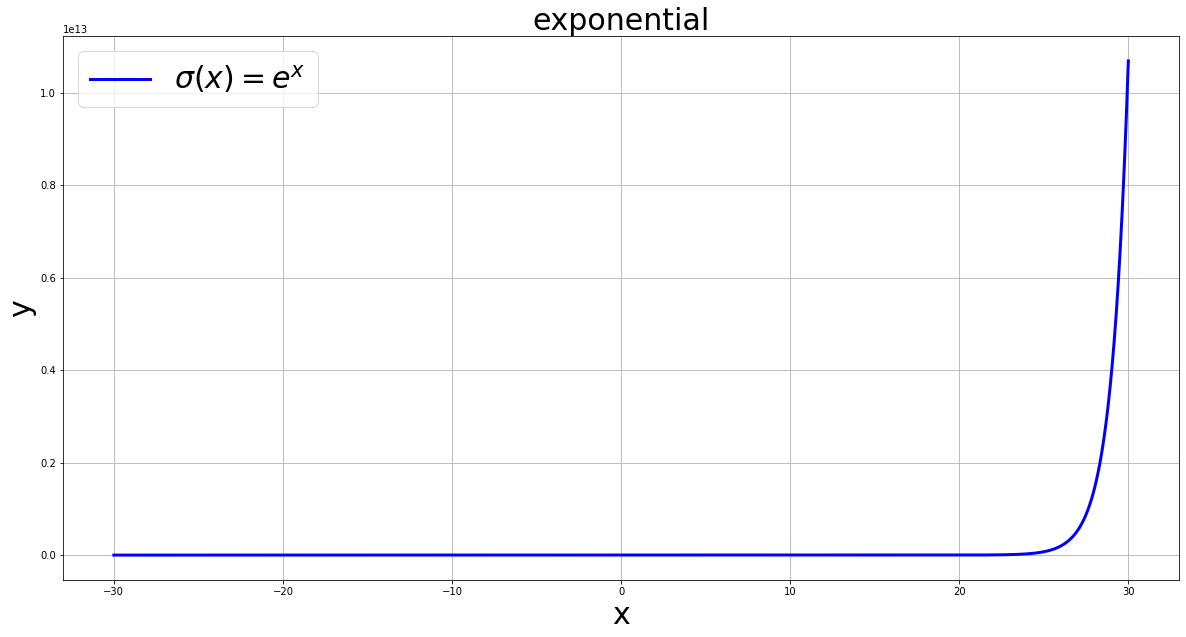

In [20]:
exp_label = r'$\sigma(x) = e^x$'
plot(exponential, 'exponential', exp_label)

<div class="alert alert-block alert-info">
    Также имеется линейная функция, т. е. отсутствие преобразования:
    <br>
    $linear = \text{lambda } x : x$
</div>    

<h2>Установка функции активации в слое Keras</h2>

Есть два варианта. Первый - просто передать её название в аргумент activation:

In [21]:
from tensorflow.keras.layers import Dense, Conv2D

In [22]:
layer1 = Dense(32, activation='relu')
layer2 = Dense(32, activation='sigmoid')
layer3 = Dense(32, activation='exponential')

Второй вариант - импортировать функцию из <i>keras.activation</i>.

In [23]:
from tensorflow.keras.activations import relu, sigmoid, exponential

layer1 = Dense(32, activation=relu)
layer2 = Dense(32, activation=sigmoid)
layer3 = Dense(32, activation=exponential)

Всё довольно просто. <b>Также в Keras</b> имеется подмодуль <i>keras.layers.advanced_activations</i>, о котором я вам расскажу позже.